In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [29]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### Normalize data

In [5]:
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000,)

## Train

In [8]:
# num of classes -> for output layer's number of neuron
K = len(set(y_train))
print(f'Number of classes: {K}')

Number of classes: 10


In [30]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
# x = GlobalMaxPooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

In [31]:
model = Model(i, x)

In [32]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 128)        

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Data augmentation

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
batch_size = 32
train_generator = data_generator.flow(X_train, y_train, batch_size)

In [45]:
steps_per_epoch = X_train.shape[0] // batch_size # num of data divided floor by batch size
r = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1562/1562 [==============================] - 22s 14ms/step - loss: 1.3483 - accuracy: 0.5150 - val_loss: 1.1901 - val_accuracy: 0.5677
Epoch 2/50
1562/1562 [==============================] - 23s 14ms/step - loss: 1.2338 - accuracy: 0.5548 - val_loss: 1.1773 - val_accuracy: 0.5810
Epoch 3/50
1562/1562 [==============================] - 22s 14ms/step - loss: 1.1545 - accuracy: 0.5869 - val_loss: 1.1363 - val_accuracy: 0.6004
Epoch 4/50
1562/1562 [==============================] - 23s 15ms/step - loss: 1.0963 - accuracy: 0.6114 - val_loss: 0.9783 - val_accuracy: 0.6505
Epoch 5/50
1562/1562 [==============================] - 23s 15ms/step - loss: 1.0389 - accuracy: 0.6304 - val_loss: 0.9891 - val_accuracy: 0.6492
Epoch 6/50
1562/1562 [==============================] - 23s 15ms/step - loss: 1.0097 - accuracy: 0.6446 - val_loss: 0.9175 - val_accuracy: 0.6727
Epoch 7/50
1562/1562 [==============================] - 23s 15ms/step - loss: 0.9724 - accuracy: 0.6573 - val_loss: 0.9069 -

### Model Evaluation

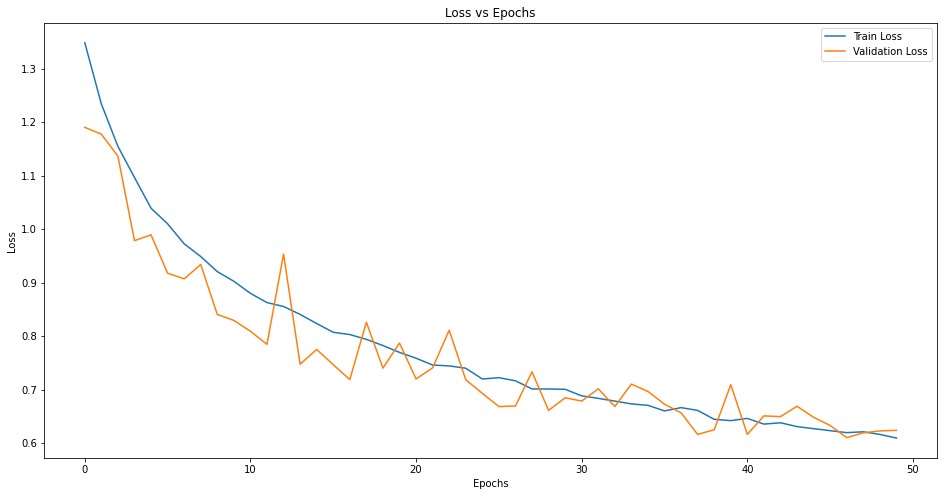

In [46]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

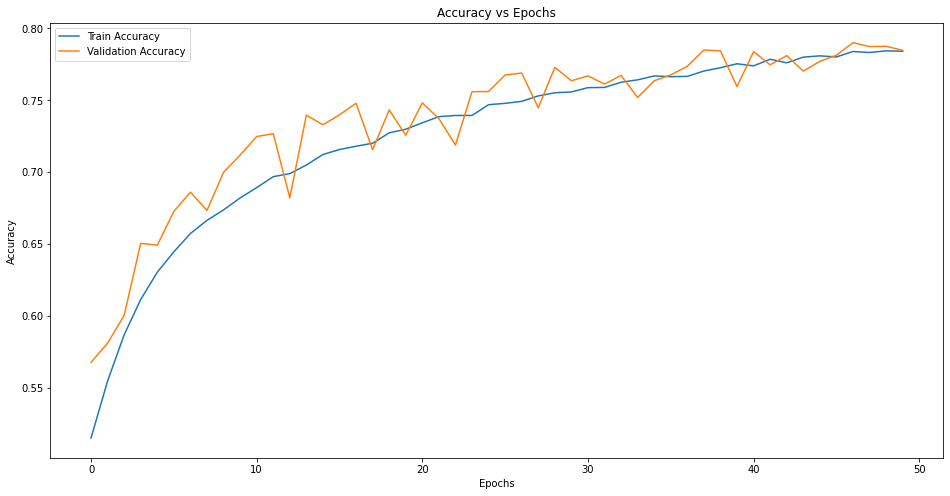

In [47]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

## Prediction on Test data

In [48]:
t_loss, t_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {t_loss}')
print(f'Test Accuracy: {t_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.6238 - accuracy: 0.7848
Test loss: 0.6238315105438232
Test Accuracy: 0.7847999930381775


### Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
y_pred = model.predict(X_test).argmax(axis=1)

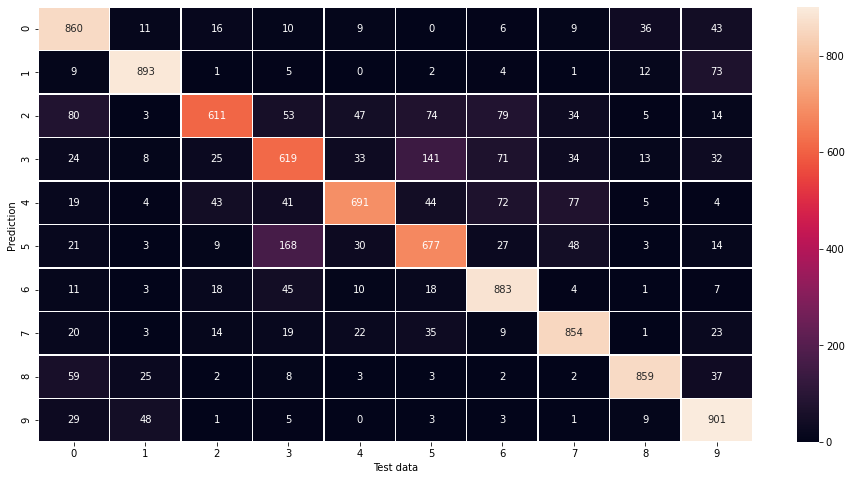

In [51]:
plt.figure(figsize=(16, 8))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=True, yticklabels=True, annot=True, fmt='d', linewidths=0.5)
plt.xlabel('Test data')
plt.ylabel('Prediction')
plt.show()